# Exploratory Data Analysis

### Preliminary Items
- More cleaning of data
    - Filter data again to only show the restaurants
    - Add dummy variables for the attributes
    
### Business Data Analysis

- Categorical analysis
    - What ategories have the most reviews?
    - What categories get the best reviews?   
- Are these restuarants still open? 
    - Does star rating conincide with restaurants closing?
- GeoSpatial Analysis
    - What states/cities does this dataset cover?
    - Are there areas that have higher restaurant ratings that others? 
    - Review counts by state/city?
- Attributes Analysis
    - What attribute correlate with higher ratings?

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
restaurants = pd.read_csv(r'C:\Users\ziggy\Springboard\Python_Projects\Yelp Restaurant Analysis\Restaurants', index_col=0)
reviews = pd.read_csv(r'C:\Users\ziggy\Springboard\Python_Projects\Yelp Restaurant Analysis\Reviews')

In [103]:
reviews.describe()

,Unnamed: 0,stars
count,4.929856e+06,4.929856e+06
mean,3.485784e+06,3.816187e+00
std,2.022722e+06,1.386674e+00
min,0.000000e+00,1.000000e+00
25%,1.718648e+06,3.000000e+00
50%,3.501808e+06,4.000000e+00
75%,5.232814e+06,5.000000e+00
max,6.990279e+06,5.000000e+00


In [86]:
restaurants.reset_index(inplace=True, drop=True)
restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': ""{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}"", 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'ByAppointmentOnly': 'False', 'WiFi': ""u'free'"", 'Alcohol': ""u'none'"", 'Caters': 'True'}","Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0', 'Thursday': '7:0-20:0', 'Friday': '7:0-21:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0'}"
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'WheelchairAccessible': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': ""{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}"", 'BikeParking': 'True', 'GoodForKids': 'True', 'Caters': 'False'}","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-22:0', 'Friday': '12:0-22:0', 'Saturday': '12:0-22:0', 'Sunday': '12:0-18:0'}"
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsAttire': ""u'casual'"", 'OutdoorSeating': 'True', 'RestaurantsReservations': 'False', 'Caters': 'False', 'RestaurantsTakeOut': 'True', 'Alcohol': ""u'none'"", 'Ambience': 'None', 'GoodForKids': 'True', 'RestaurantsPriceRange2': '1', 'ByAppointmentOnly': 'False', 'CoatCheck': 'False', 'DogsAllowed': 'False', 'RestaurantsTableService': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsDelivery': 'True', 'WiFi': ""u'no'"", 'WheelchairAccessible': 'True', 'HasTV': 'True', 'HappyHour': 'False', 'DriveThru': 'True', 'BikeParking': 'False'}","Burgers, Fast Food, Sandwiches, Food, Ice Cream & Frozen Yogurt, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', 'Wednesday': '6:0-22:0', 'Thursday': '6:0-22:0', 'Friday': '9:0-0:0', 'Saturday': '9:0-22:0', 'Sunday': '8:0-22:0'}"
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ""'casual'"", 'RestaurantsGoodForGroups': 'False', 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'True', 'GoodForKids': 'True', 'Alcohol': ""u'none'"", 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}"", 'DogsAllowed': 'False', 'RestaurantsTableService': 'False', 'ByAppointmentOnly': 'False', 'WiFi': ""u'no'"", 'RestaurantsPriceRange2': '1', 'RestaurantsReservations': 'False', 'HasTV': 'True', 'RestaurantsDelivery': 'True', 'CoatCheck': 'False', 'Caters': 'False', 'RestaurantsTakeOut': 'True', 'DriveThru': 'True', 'HappyHour': 'False', 'WheelchairAccessible': 'True'}","Ice Cream & Frozen Yogurt, Fast Food, Burgers, Restaurants, Food","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', 'Wednesday': '6:0-21:0', 'Thursday': '6:0-16:0', 'Friday': '6:0-16:0', 'Saturday': '6:0-17:0', 'Sunday': '6:0-21:0'}"
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None', 'RestaurantsReservations': 'False', 'Ambience': ""{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}"", 'GoodForMeal': ""{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}"", 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}""}","Vietnamese, Food, Restaurants, Food Tr

In [87]:
restaurants.describe()

,latitude,longitude,stars,review_count,is_open
count,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000
mean,36.896280,-88.088808,3.570611,86.862938,0.720036
std,6.004440,13.940555,0.846156,185.884628,0.448985
min,27.564457,-120.083748,1.000000,5.000000,0.000000
25%,32.190429,-90.249359,3.000000,14.000000,0.000000
50%,38.920131,-86.059842,3.500000,34.000000,1.000000
75%,39.956700,-75.376559,4.000000,89.000000,1.000000
max,53.649743,-74.661348,5.000000,7568.000000,1.000000


In [88]:
# How many unique restaurants are there? 
restaurants.nunique()

#There are 37,050 unique restuarant names. 

business_id     54800
name            37050
address         45748
city            946  
state           16   
postal_code     2124 
latitude        51945
longitude       51386
stars           9    
review_count    1141 
is_open         2    
attributes      52782
categories      34629
hours           24786
dtype: int64

In [89]:
#Let's have a look at all the categories

categories = pd.DataFrame(restaurants[['categories', 'stars']])
categories

,categories,stars
0,"Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries",4.0
1,"Brewpubs, Breweries, Food",4.5
2,"Burgers, Fast Food, Sandwiches, Food, Ice Cream & Frozen Yogurt, Restaurants",2.0
3,"Ice Cream & Frozen Yogurt, Fast Food, Burgers, Restaurants, Food",1.5
4,"Vietnamese, Food, Restaurants, Food Trucks",4.0
...,...,...
54795,"Cafes, Juice Bars & Smoothies, Coffee & Tea, Restaurants, Food",4.0
54796,"Specialty Food, Food, Coffee & Tea, Coffee Roasteries",4.5
54797,"Restaurants, Mexican",4.5
54798,"Restaurants, Comfort Food, Food, Food Trucks, Caterers, Event Planning & Services",4.5


### Issue: Categories are not specific enough. I will need t narrow the data once more. The tag must have "Restaurants" and not just "Food" or "Restaurant"

In [90]:
pattern = 'Restaurant|Restaurants|restaurants|retaurant'
categories = categories['categories'].str.contains(pattern, case=False, na=False)
categories

0        True 
1        False
2        True 
3        True 
4        True 
         ...  
54795    True 
54796    False
54797    True 
54798    True 
54799    True 
Name: categories, Length: 54800, dtype: bool

In [92]:
restaurants_data = restaurants[categories]

In [95]:
restaurants_data.isna().sum()

business_id     0  
name            0  
address         205
city            0  
state           0  
postal_code     7  
latitude        0  
longitude       0  
stars           0  
review_count    0  
is_open         0  
attributes      0  
categories      0  
hours           0  
dtype: int64

In [96]:
restaurants_data = restaurants_data.dropna()

In [99]:
restaurants_data.to_csv('Restaurants_Data_Clean')

### Need to also fix the reviews data. 

In [106]:
m = reviews.business_id.isin(restaurants_data.business_id)

reviews_data = reviews[m]

In [107]:
reviews_data.describe()

,Unnamed: 0,stars
count,4.551325e+06,4.551325e+06
mean,3.483546e+06,3.807543e+00
std,2.022421e+06,1.385283e+00
min,0.000000e+00,1.000000e+00
25%,1.713575e+06,3.000000e+00
50%,3.502655e+06,4.000000e+00
75%,5.230568e+06,5.000000e+00
max,6.990279e+06,5.000000e+00


In [108]:
reviews_data.to_csv('Reviews_Data_Clean')

This is strange, there's definitely some odd businesses out there.. In the data wrnagling I made sure to specify that the categories must include "Restaurants" or "food". There must be establishments that have both "Restaurant" and "Septic Services" tags.. 

In [122]:
restaurants_data[restaurants_data.categories.str.contains('Web Design')]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
39829,hAvgXT37uaQBfFmSjBPxEA,Cheer Counseling,339 E Robertson St,Brandon,FL,33511,27.956046,-82.312629,1.0,5,0,{'ByAppointmentOnly': 'False'},"Professional Services, Health & Medical, Restaurants, Barbeque, Web Design, Counseling & Mental Health, Pizza","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', 'Wednesday': '9:0-20:0', 'Thursday': '9:0-20:0', 'Friday': '9:0-20:0', 'Saturday': '10:0-16:0'}"


In [118]:
restaurants_data = pd.read_csv(r'C:\Users\ziggy\Springboard\Python_Projects\Yelp Restaurant Analysis\Restaurants_Data_Clean', index_col=0)
reviews = pd.read_csv(r'C:\Users\ziggy\Springboard\Python_Projects\Yelp Restaurant Analysis\Reviews_Data_Clean')

# Categorical Analysis

In this section I will try to see if there are any correlations between categories (Mexican, Somali, Thai, etc.) and star ratings. 

In [61]:
category = pd.DataFrame(restaurants_data[['categories', 'stars', 'review_count']])
category['categories'] = category['categories'].str.split(', ')
category = category.explode('categories').reset_index(drop=True)

In [134]:
restaurants_data.nunique()

business_id     44486
name            31226
address         37396
city              873
state              15
postal_code      1954
latitude        42389
longitude       41966
stars               9
review_count     1131
is_open             2
attributes      43519
categories      28906
hours           20583
dtype: int64

In [62]:
category.nunique()

categories       695
stars              9
review_count    1131
dtype: int64

In [171]:
pivot = category.pivot_table(index =['categories'],
                       values =['stars', 'review_count'],
                       aggfunc ={'stars':'mean', 
                                 'review_count':'sum'}).sort_values(by='stars', ascending=False)
print(pivot)

                       review_count  stars
categories                                
Comic Books                     110   5.00
Water Stores                      9   5.00
Honey                            48   5.00
Somali                          127   5.00
Real Estate Agents                5   5.00
...                             ...    ...
Train Stations                   57   1.50
Service Stations                  7   1.50
Public Transportation            57   1.50
Pediatricians                    12   1.25
Web Design                        5   1.00

[695 rows x 2 columns]


C:\Users\ziggy\anaconda3\envs\Springboard\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_open', ylabel='count'>

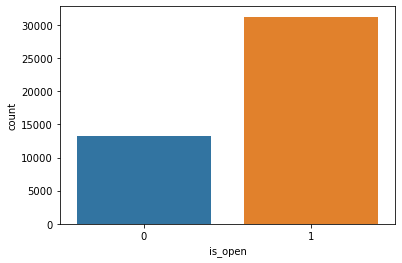

In [55]:
sns.countplot(restaurants_data.is_open)

##### A lot of the restuarants in this dataset are closed. Almost 30% actually.. This could be due to economic conditions from Covid-19. 

(0.0, 6.0)

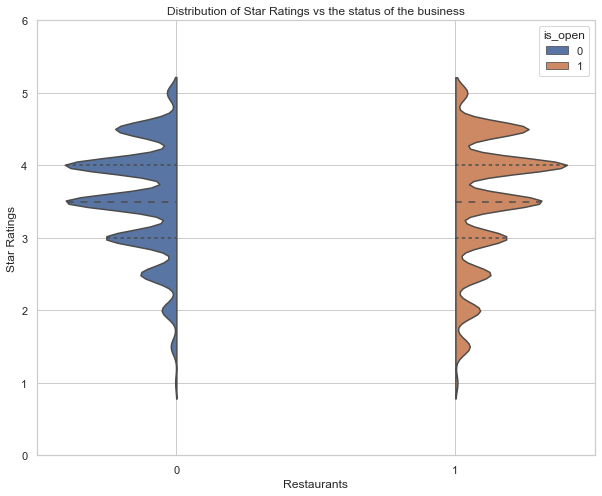

In [57]:
sns.set(font_scale = 1)
sns.set_context({"figure.figsize": (10, 8)})
sns.set_style("whitegrid")

g = sns.violinplot(x='is_open',y = 'stars',hue='is_open', data = restaurants_data,
                  split=True,inner="quart")

plt.title("Distribution of Star Ratings vs the status of the business")
plt.xlabel('Restaurants')
plt.ylabel('Star Ratings')
g.axes.grid('off')
plt.ylim(0, 6)

#### There is not very much differnece between the distribution of star rating and status of businesses. This suggests that the closures are not necessarily correlated with the star ratings of the businesses. Clearly the star ratings are not the only important variable in restaurant closure.

# Geospatial Analysis

For the geospatial analysis I will be concentrating on specific regions of the US.

In [140]:
import folium

In [141]:
restaurants_data.state.unique()

array(['PA', 'TN', 'IN', 'FL', 'AB', 'NV', 'IL', 'AZ', 'LA', 'CA', 'NJ',
       'MO', 'ID', 'DE', 'NC'], dtype=object)

In [142]:
restaurants_data.state.value_counts()

PA    10591
FL     7643
MO     3756
TN     3730
IN     3558
LA     3098
NJ     2791
AZ     2235
AB     1983
NV     1401
ID     1110
CA      973
IL      818
DE      798
NC        1
Name: state, dtype: int64

In [150]:
pivot = restaurants_data.pivot_table(index =['state'],
                       values =['stars', 'review_count'],
                       aggfunc ={'stars':'mean', 
                                 'review_count':'sum'}).sort_values(by='review_count', ascending=False)
print(pivot)

       review_count     stars
state                        
PA          1014359  3.558871
FL           740386  3.595970
LA           531926  3.630245
TN           409169  3.499330
MO           331976  3.460330
IN           312252  3.481872
AZ           246057  3.477852
NV           223778  3.561742
CA           199220  3.800103
NJ           154450  3.509495
ID            92783  3.562613
AB            61152  3.550681
DE            43477  3.434211
IL            32407  3.270171
NC               29  2.000000


In [153]:
pivot = restaurants_data.pivot_table(index =['city'],
                       values =['stars', 'review_count'],
                       aggfunc ={'stars':'mean', 
                                 'review_count':'sum'}).sort_values(by='review_count', ascending=False)
print(pivot)

                     review_count     stars
city                                       
Philadelphia               640825  3.594971
New Orleans                457189  3.769829
Nashville                  308641  3.601084
Tampa                      284824  3.611367
Indianapolis               233079  3.502473
...                           ...       ...
Thonosassa                      5  4.000000
W.Chester                       5  3.000000
Meridian                        5  3.500000
Westhampton                     5  2.000000
Pittsgrove Township             5  4.000000

[873 rows x 2 columns]


In [146]:
pa_restaurants = restaurants_data.loc[restaurants_data['state']=='PA']
ca_restaurants = restaurants_data.loc[restaurants_data['state']=='CA']
il_restaurants = restaurants_data.loc[restaurants_data['state']=='IL']


In [147]:
il_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
18,ljxNT9p0y7YMPx0fcNBGig,Tony's Restaurant & 3rd Street Cafe,312 Piasa St,Alton,IL,62002,38.896563,-90.186203,3.0,94,1,"{'RestaurantsReservations': 'True', 'Restauran...","Restaurants, Specialty Food, Steakhouses, Food...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:30',..."
43,EuRGgOwJ0g1vTj2R04j37Q,Crafty Crab,51 Ludwig Dr,Fairview Heights,IL,62208,38.601298,-89.989683,2.5,14,1,"{'BusinessParking': ""{u'valet': False, u'garag...","Seafood, Restaurants","{'Monday': '12:0-22:0', 'Tuesday': '12:0-22:0'..."
184,uYBx50Yl_Jc-UYwFzudBsQ,Chew Doin Fried Chicken & Ramen,210 South Buchanan,Edwardsville,IL,62025,38.810591,-89.952484,3.0,10,0,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Restaurants, Chicken Shop, Ramen, Japanese","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
250,zjQDk4tZyhEroyqtkgvx0g,The Cobblestone Eatery and Drinkery,115 W St Louis St,Lebanon,IL,62254,38.604107,-89.808533,3.5,52,1,"{'RestaurantsDelivery': 'False', 'BestNights':...","American (Traditional), Nightlife, Breakfast &...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
298,gI34hM-873fwF1XQ8hOaSg,Joe’s Pizza and Pasta,"5775 Godfrey Rd, Ste A",Godfrey,IL,62035,38.949183,-90.190306,4.0,17,1,"{'HasTV': 'True', 'RestaurantsTableService': '...","Salad, Pizza, Restaurants, Italian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."


In [148]:
restaurants_map = folium.Map(location = [38, -98], zoom_start=4)

for (index,row) in il_restaurants.iterrows():
        folium.Marker(location=[row.loc['latitude'],row.loc['longitude']],
                 popup=row.loc['name'] + ' ' +row.loc['city']+' '+row.loc['state'],
                 tooltip ='click').add_to(restaurants_map)
restaurants_map

##### Notes
The dataset does not contain a good dispersion of restuarants accross the USA. Even in specific states the dispersion of restaurants is not very good. In California for instance the data only shows 973 restaurants and almost all of them are in Santa Barbara and the surrounding areas. There are no restaurants in LA for instance. 

This is similar with most states in the dataset. Ilinois is slightly more dispersed and Pennsylvania has the best overall dispersion and representation in the data with 10,591 restaurants.

However, we notice that the average star rating by state is not so far off from the global dataset average (excepted for the data from North Carolina where only 29 reviews are present)

Our top cities are:

|city               |    review_count |      stars |
|------------------ | --------------- | ---------- |
|Philadelphia       |          640,825 |   3.594971 |
|New Orleans        |          457,189 |   3.769829 |
|Nashville          |          308,641 |   3.601084 |
|Tampa              |          284,824 |   3.611367 |
|Indianapolis       |          233,079 |   3.502473 |





I think think will be a good scope for our restaurant investor recomendation. 

# Attributes Analysis

In [217]:
# Load normed dataset using json_normalize()

restaurants_norm = pd.read_csv(r'C:\Users\ziggy\Springboard\Python_Projects\Yelp Restaurant Analysis\Data\Restaurants_Norm.csv')

C:\Users\ziggy\anaconda3\envs\Springboard\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (5,8,15,18,21,49,55,62,66,70,82,100) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [218]:
restaurants_norm.head()

,business_id,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,hours.Thursday.open,attributes.Order at Counter,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.BYOB,hours.Friday.open,...,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Hair Types Specialized In.perms,attributes.Music.jukebox,attributes.Ambience.upscale
0,JwUE5GmEO-sH1FuwJgKBlQ,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,casual,NaN,True,NaN,NaN,False,NaN,NaN,False
1,uGykseHzyS5xAMWoN6YUqA,False,NaN,NaN,6:00,NaN,NaN,NaN,NaN,6:00,...,NaN,casual,NaN,True,NaN,NaN,False,NaN,NaN,False
2,LRKJF43s9-3jG9Lgx4zODg,NaN,NaN,NaN,10:30,NaN,NaN,NaN,NaN,10:30,...,NaN,casual,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,RgDg-k9S5YD_BaxMckifkg,NaN,NaN,NaN,11:00,NaN,NaN,NaN,NaN,11:00,...,NaN,casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rdAdANPNOcvUtoFgcaY9KA,True,NaN,NaN,6:00,NaN,NaN,NaN,NaN,6:00,...,NaN,casual,NaN,True,NaN,NaN,False,NaN,NaN,False


In [219]:
restaurants_norm.columns

Index(['business_id', 'attributes.Ambience.divey',
       'attributes.Dietary Restrictions.vegan', 'attributes.Happy Hour',
       'hours.Thursday.open', 'attributes.Order at Counter',
       'attributes.Hair Types Specialized In.africanamerican',
       'attributes.Hair Types Specialized In.kids', 'attributes.BYOB',
       'hours.Friday.open',
       ...
       'attributes.Smoking', 'attributes.Attire',
       'attributes.Hair Types Specialized In.curly',
       'attributes.Good For Groups', 'neighborhoods',
       'attributes.Open 24 Hours', 'attributes.Ambience.romantic',
       'attributes.Hair Types Specialized In.perms',
       'attributes.Music.jukebox', 'attributes.Ambience.upscale'],
      dtype='object', length=105)

#### Initial thoughts: 

There are lots of attributes that came out of the woodwork when normalizing (flattening) the json dictionaries. I think a lot of theseare not going to be useful and will need to be dropped. For isntance, I don't think the Hair Types Specialized In attributes have much to do with restuarants or will have any significant impact on the analysis. 


I will first need to deal with NaN values. 


In [220]:
    # Convert selected columns to boolean type
    col_dict_bool = {'attributes.Accepts Credit Cards':np.bool,'attributes.Accepts Insurance':np.bool,
                     'attributes.Ambience.casual':np.bool,'attributes.Ambience.classy':np.bool,'attributes.Ambience.divey':np.bool,
                     'attributes.Ambience.hipster':np.bool,'attributes.Ambience.intimate':np.bool,
                     'attributes.Ambience.romantic':np.bool,'attributes.Ambience.touristy':np.bool,
                     'attributes.Ambience.trendy':np.bool, 'attributes.Ambience.upscale':np.bool,'attributes.BYOB':np.bool,
                     'attributes.By Appointment Only':np.bool,
                     'attributes.Caters':np.bool,'attributes.Coat Check':np.bool,'attributes.Corkage':np.bool,
                     'attributes.Delivery':np.bool,'attributes.Dietary Restrictions.dairy-free':np.bool,
                     'attributes.Dietary Restrictions.gluten-free':np.bool,
                     'attributes.Dietary Restrictions.halal':np.bool,'attributes.Dietary Restrictions.kosher':np.bool,
                     'attributes.Dietary Restrictions.soy-free':np.bool,'attributes.Dietary Restrictions.vegan':np.bool,
                     'attributes.Dietary Restrictions.vegetarian':np.bool,'attributes.Dogs Allowed':np.bool,
                     'attributes.Drive-Thru':np.bool,'attributes.Good For Dancing':np.bool,'attributes.Good For Groups':np.bool,
                     'attributes.Good For.breakfast':np.bool,'attributes.Good For.brunch':np.bool,
                     'attributes.Good For.dessert':np.bool,'attributes.Good For.dinner':np.bool,
                     'attributes.Good For.latenight':np.bool,'attributes.Good For.lunch':np.bool,'attributes.Good for Kids':np.bool,
                     'attributes.Happy Hour':np.bool,'attributes.Has TV':np.bool,'attributes.Music.background_music':np.bool,
                     'attributes.Music.dj':np.bool,'attributes.Music.jukebox':np.bool,
                     'attributes.Music.karaoke':np.bool,'attributes.Music.live':np.bool,
                     'attributes.Music.video':np.bool,'attributes.Open 24 Hours':np.bool,'attributes.Order at Counter':np.bool,
                     'attributes.Outdoor Seating':np.bool,'attributes.Parking.garage':np.bool,'attributes.Parking.lot':np.bool,
                     'attributes.Parking.street':np.bool,'attributes.Parking.valet':np.bool,'attributes.Parking.validated':np.bool,
                     'attributes.Take-out':np.bool,'attributes.Takes Reservations':np.bool,'attributes.Waiter Service':np.bool,
                     'attributes.Wheelchair Accessible' :np.bool          
                    }
    map_dict = {False:0, True:1}
    # Mapping
    for col in restaurants_norm.columns:
        if col in col_dict_bool.keys():
            restaurants_norm[col] = restaurants_norm[col].map(map_dict)

C:\Users\ziggy\AppData\Local\Temp/ipykernel_17688/3506487119.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  col_dict_bool = {'attributes.Accepts Credit Cards':np.bool,'attributes.Accepts Insurance':np.bool,
C:\Users\ziggy\AppData\Local\Temp/ipykernel_17688/3506487119.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'attributes.Ambience.casu

In [221]:
restaurants_norm.head()

,business_id,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,hours.Thursday.open,attributes.Order at Counter,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.BYOB,hours.Friday.open,...,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Hair Types Specialized In.perms,attributes.Music.jukebox,attributes.Ambience.upscale
0,JwUE5GmEO-sH1FuwJgKBlQ,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,casual,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0
1,uGykseHzyS5xAMWoN6YUqA,0.0,NaN,NaN,6:00,NaN,NaN,NaN,NaN,6:00,...,NaN,casual,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0
2,LRKJF43s9-3jG9Lgx4zODg,NaN,NaN,NaN,10:30,NaN,NaN,NaN,NaN,10:30,...,NaN,casual,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,RgDg-k9S5YD_BaxMckifkg,NaN,NaN,NaN,11:00,NaN,NaN,NaN,NaN,11:00,...,NaN,casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rdAdANPNOcvUtoFgcaY9KA,1.0,NaN,NaN,6:00,NaN,NaN,NaN,NaN,6:00,...,NaN,casual,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0


In [222]:
#remove any columns that only have NaN. 
restaurants_norm = restaurants_norm.dropna(axis = 1,how = 'all')


In [223]:
#import warnings
#warnings.filterwarnings("ignore")

col_list = []
for name in restaurants_norm.columns:
    if 'attributes' in name and name in col_dict_bool.keys():
        col_list.append(name)

col_list.append('stars')

print ("Total features defining the attributes of a business")
print (len(col_list))

Total features defining the attributes of a business
56


In [224]:
restaurants_atts = restaurants_norm[['attributes.Ambience.divey',
 'attributes.Dietary Restrictions.vegan',
 'attributes.Happy Hour',
 'attributes.Order at Counter',
 'attributes.BYOB',
 'attributes.Outdoor Seating',
 'attributes.Ambience.classy',
 'attributes.Parking.lot',
 'attributes.Ambience.touristy',
 'attributes.Corkage',
 'attributes.Good For.brunch',
 'attributes.Waiter Service',
 'attributes.Parking.street',
 'attributes.Ambience.hipster',
 'attributes.Music.live',
 'attributes.Dietary Restrictions.dairy-free',
 'attributes.Music.background_music',
 'attributes.Good For.breakfast',
 'attributes.Parking.garage',
 'attributes.Music.karaoke',
 'attributes.Good For Dancing',
 'attributes.Accepts Credit Cards',
 'attributes.Good For.lunch',
 'attributes.Parking.valet',
 'attributes.Take-out',
 'attributes.Good For.dessert',
 'attributes.Music.video',
 'attributes.Dietary Restrictions.halal',
 'attributes.Takes Reservations',
 'attributes.Ambience.trendy',
 'attributes.Delivery',
 'attributes.Wheelchair Accessible',
 'attributes.Dietary Restrictions.gluten-free',
 'attributes.Caters',
 'attributes.Ambience.intimate',
 'attributes.Good For.latenight',
 'attributes.Good For.dinner',
 'attributes.Coat Check',
 'attributes.Good for Kids',
 'attributes.Parking.validated',
 'attributes.Accepts Insurance',
 'attributes.Music.dj',
 'attributes.Dietary Restrictions.soy-free',
 'attributes.Has TV',
 'attributes.Ambience.casual',
 'attributes.By Appointment Only',
 'attributes.Dietary Restrictions.kosher',
 'attributes.Dogs Allowed',
 'attributes.Drive-Thru',
 'attributes.Dietary Restrictions.vegetarian',
 'attributes.Good For Groups',
 'attributes.Open 24 Hours',
 'attributes.Ambience.romantic',
 'attributes.Music.jukebox',
 'attributes.Ambience.upscale']]

In [225]:
restaurants_atts.sum(axis=0).sort_values(ascending=False)


attributes.Take-out                            12032.0
attributes.Good For Groups                     11736.0
attributes.Good for Kids                       10917.0
attributes.Wheelchair Accessible                9218.0
attributes.Accepts Credit Cards                 9075.0
attributes.Parking.lot                          8821.0
attributes.Waiter Service                       7534.0
attributes.Outdoor Seating                      6003.0
attributes.Has TV                               5626.0
attributes.Ambience.casual                      5434.0
attributes.Good For.lunch                       5260.0
attributes.Takes Reservations                   4249.0
attributes.Good For.dinner                      4228.0
attributes.Caters                               4068.0
attributes.Delivery                             2342.0
attributes.Parking.street                       1431.0
attributes.Parking.garage                       1102.0
attributes.Good For.breakfast                   1070.0
attributes

In [230]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [233]:
restaurants_norm.corrwith(restaurants_norm["open"]).sort_values(ascending=False)

open                                           1.000000
attributes.Open 24 Hours                       0.161222
attributes.Drive-Thru                          0.150483
review_count                                   0.091640
latitude                                       0.067759
longitude                                      0.060951
attributes.Good for Kids                       0.059101
attributes.Good For.brunch                     0.055542
attributes.Good For.breakfast                  0.046441
attributes.Dietary Restrictions.gluten-free    0.038731
attributes.Music.jukebox                       0.036685
stars                                          0.036045
attributes.Ambience.casual                     0.030987
attributes.Order at Counter                    0.018585
attributes.Ambience.divey                      0.016144
attributes.Take-out                            0.014378
attributes.Dogs Allowed                        0.013390
attributes.Parking.garage                      0

(0.0, 6.0)

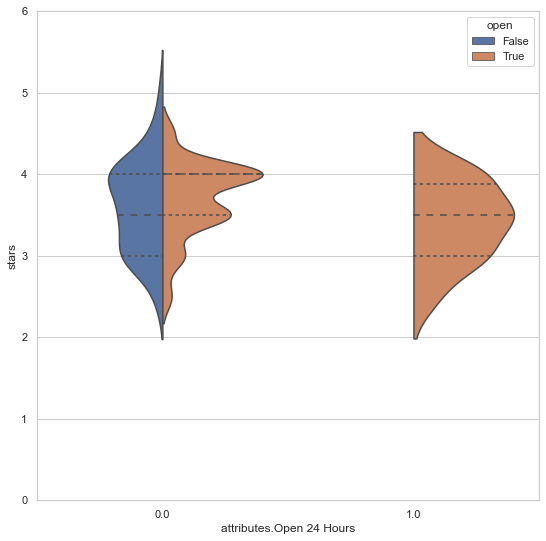

In [235]:
f, ax = plt.subplots(figsize=(9, 9))
sns.violinplot(x='attributes.Open 24 Hours',y='stars',hue='open',
               data=restaurants_norm,split=True,inner="quart")
plt.ylim(0,6)

#We can see that 24-hour service is correlated with a restaurant being open or not. 

(0.0, 6.0)

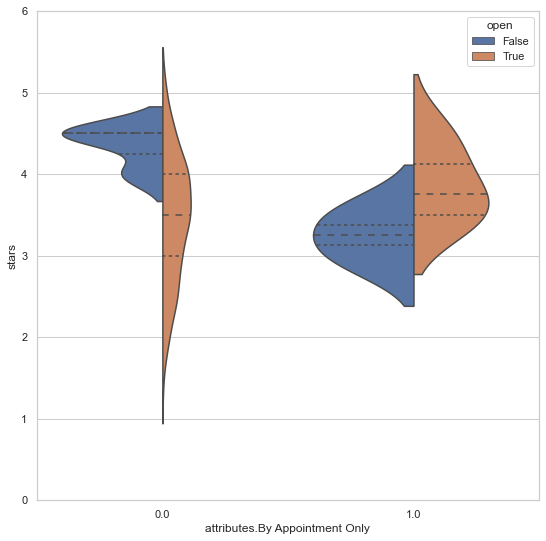

In [236]:
f, ax = plt.subplots(figsize=(9, 9))
sns.violinplot(x='attributes.By Appointment Only',y='stars',hue='open',
               data=restaurants_norm,split=True,inner="quart")
plt.ylim(0,6)

(0.0, 6.0)

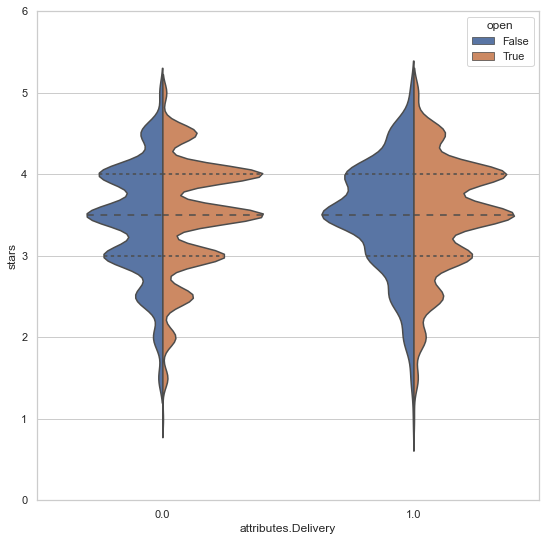

In [228]:
f, ax = plt.subplots(figsize=(9, 9))
sns.violinplot(x='attributes.Delivery',y='stars',hue='open',
               data=restaurants_norm,split=True,inner="quart")
plt.ylim(0,6)

<AxesSubplot:>

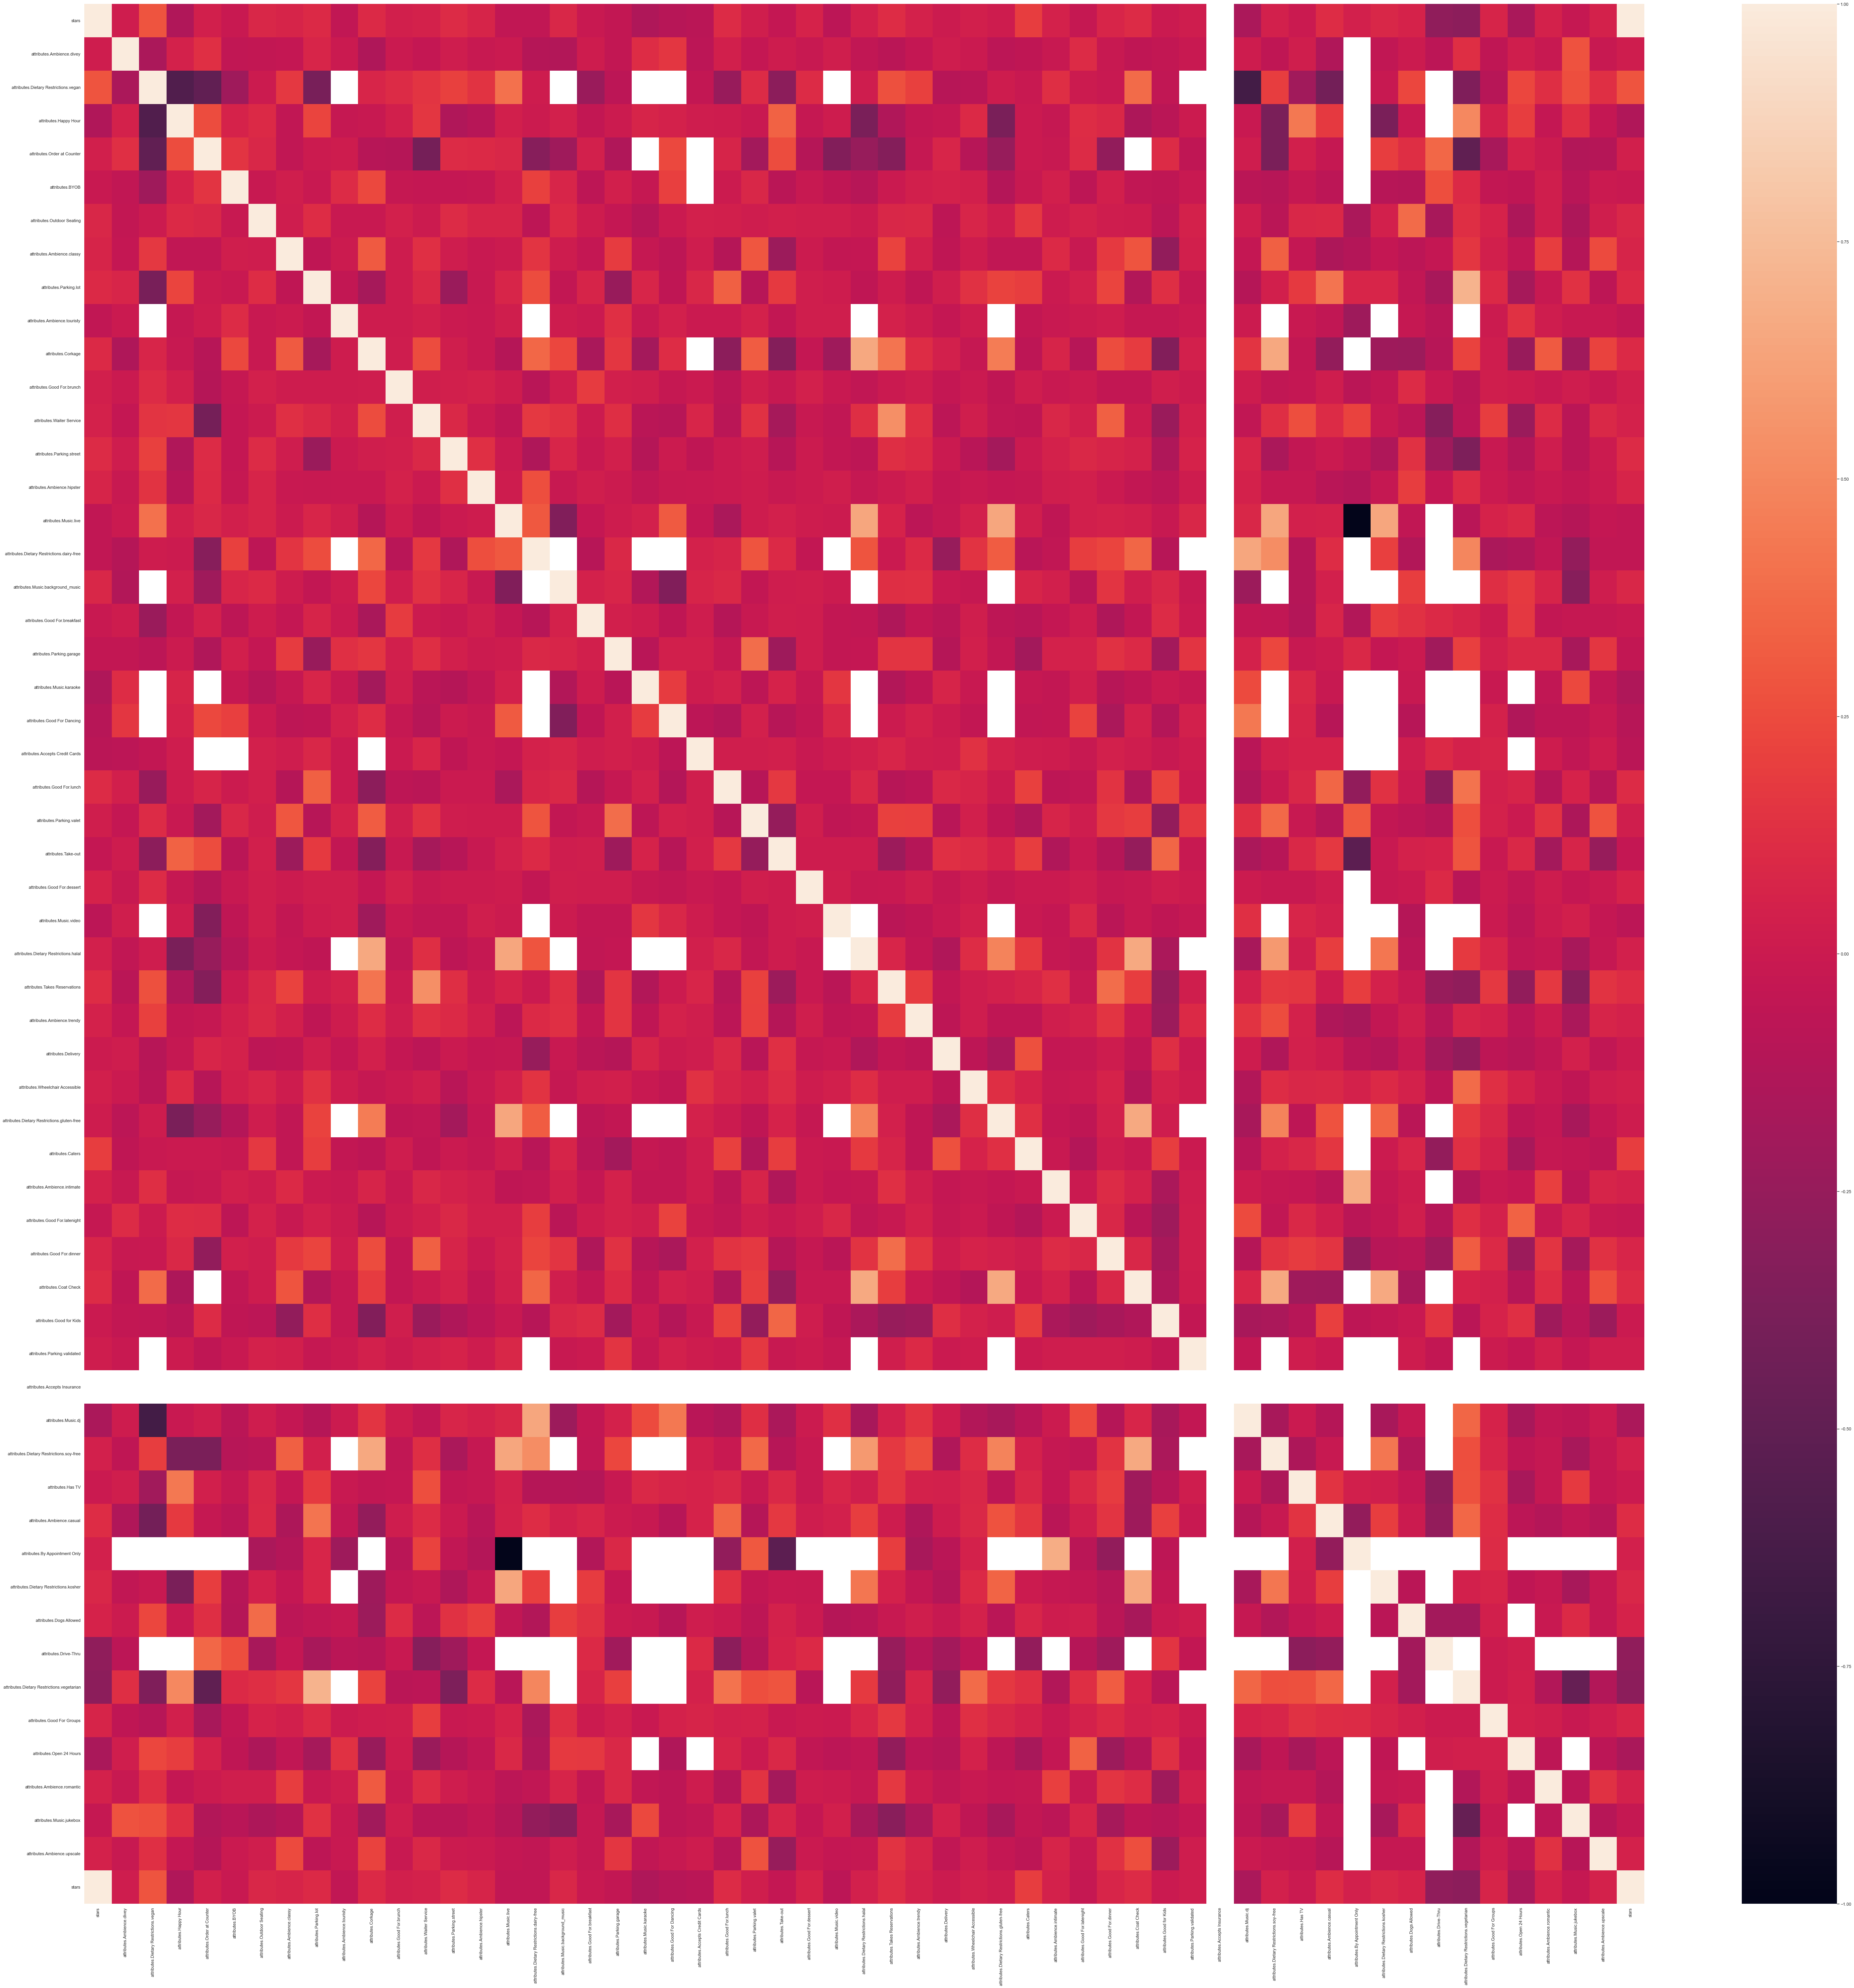

In [193]:
plt.subplots(figsize=(90,90))
sns.heatmap(restaurants_atts.corr(), annot = False)

Interestingly there are some significant correlations between the attributes. 